# Plot the kinematics recovery using "triaxial ellipticity"

The calculation code in in './triaxial_ellipticity_kin_recovery.ipynb'

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from cycler import cycler
import matplotlib as mpl
clist = ['#04B2D9', '#F2B33D', '#F29966', '#F2441D', '#0486C5']
mpl.rcParams['axes.prop_cycle'] = cycler(color=clist)
import matplotlib.patches as patches

from deproject.Util.ellipticity import Axis_ratio2ellipticity

In [2]:
data_oblate_tri = np.load('./triaxial_ellipticity_oblate.npy')
data_prolate_tri = np.load('./triaxial_ellipticity_prolate.npy')

data_oblate_axi = np.load('./tng_kin_oblate.npy')
data_prolate_axi = np.load('./tng_kin_prolate.npy')

data_oblate_axi[1, :] = Axis_ratio2ellipticity(data_oblate_axi[1, :])
data_prolate_axi[1, :] = -1 * Axis_ratio2ellipticity(data_prolate_axi[1, :])

In [3]:
def percent_diff(a, b):
    return np.abs(a-b) / np.mean([a, b]) * 100

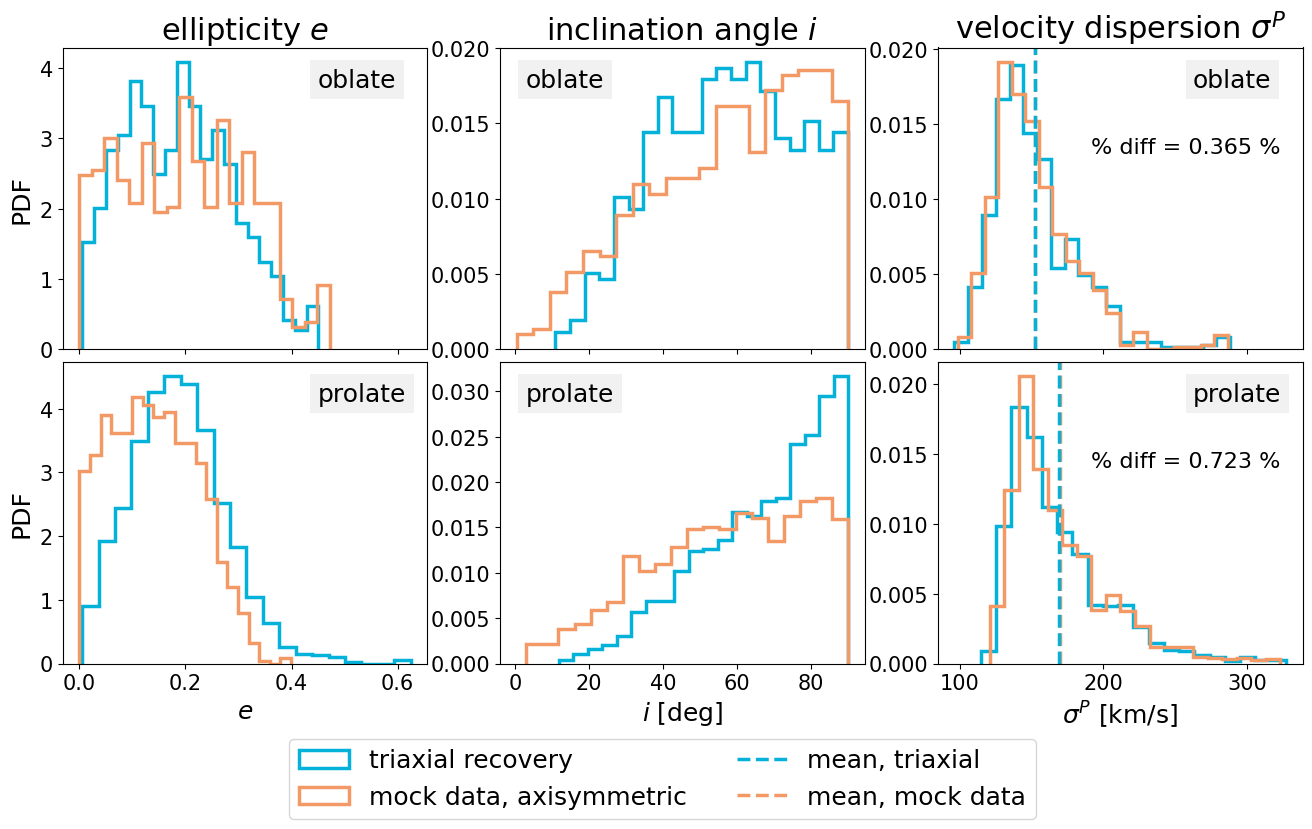

In [ ]:
# Create a figure and a grid of subplots
fig = plt.figure(figsize = (16, 8))
gs = fig.add_gridspec(2, 3, hspace=0.04)
axs = gs.subplots(sharex='col')
axs = axs.flatten()

color_data = clist[2]
color_tri = clist[0]

lw_hist = 2.5

for ax in axs.flatten():
    ax.xaxis.label.set(fontsize=18)
    ax.yaxis.label.set(fontsize=18)
    ax.tick_params(axis='both', labelsize = 15)

data_axi = [data_oblate_axi, data_prolate_axi]

for j, data in enumerate([data_oblate_tri, data_prolate_tri]):

    # plot the triaxial data
    axs[3*j].hist(data[1, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_tri)
    axs[3*j+1].hist(np.degrees(data[0, :]), bins=20, density=True, histtype='step', lw=lw_hist, color=color_tri)
    axs[3*j+2].hist(data[2, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_tri)

    # plot the axisymmetric data
    axs[3*j].hist(data_axi[j][1, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_data)
    axs[3*j+1].hist(data_axi[j][3, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_data)
    axs[3*j+2].hist(data_axi[j][2, :], bins=20, density=True, histtype='step', lw=lw_hist, color=color_data)

    # plot the mean values
    mean_sigma_e_data = np.mean(data_axi[j][2, :])
    mean_vel_disp_tri_all = np.mean(data[2, :])
    axs[3*j+2].axvline(mean_sigma_e_data, marker = ' ', ls = '--', label = 'mean, mock data', color=color_data, lw=lw_hist)
    axs[3*j+2].axvline(mean_vel_disp_tri_all, marker = ' ', ls = '--', label = 'mean, recovered triaxial', color = color_tri, lw=lw_hist)
    axs[3*j+2].text(0.42, 0.65, s = '% diff = {:.3f} %' .format(percent_diff(mean_sigma_e_data, mean_vel_disp_tri_all)), fontsize=16, transform = axs[3*j+2].transAxes)


axs[0].set_title('ellipticity $e$', fontsize=22)
axs[1].set_title('inclination angle $i$', fontsize=22)
axs[2].set_title(r'velocity dispersion $\sigma^P$', fontsize=22)
axs[0].set_ylabel('PDF', fontsize=18)
axs[3].set_ylabel('PDF', fontsize=18)
# axs[3].sharey(axs[0])
# axs[4].sharey(axs[1])
# axs[5].sharey(axs[2])
axs[3].set_xlabel('$e$', fontsize=18)
axs[4].set_xlabel('$i$ [deg]', fontsize=18)
axs[5].set_xlabel(r'$\sigma^P$ [km/s]', fontsize=18)

# anootate for oblate and prolate
props = dict(boxstyle = 'square', facecolor = 'lightgray', alpha = 0.3, edgecolor = 'None')
for ax in [axs[0], axs[2]]:
    ax.text(0.7, 0.87, 'oblate', transform = ax.transAxes, fontsize = 18, bbox=props)
for ax in [axs[3], axs[5]]:
    ax.text(0.7, 0.87, 'prolate', transform = ax.transAxes, fontsize = 18, bbox=props)
axs[1].text(0.07, 0.87, 'oblate', transform = axs[1].transAxes, fontsize = 18, bbox=props)
axs[4].text(0.07, 0.87, 'prolate', transform = axs[4].transAxes, fontsize = 18, bbox=props)

# make some dummy plots for the legend 
handles = []
handles.append(patches.Patch(edgecolor=color_tri, facecolor='none', label='triaxial recovery', lw=lw_hist))
handles.append(patches.Patch(edgecolor=color_data, facecolor='none', label='mock data, axisymmetric', lw = lw_hist))
handles.append(plt.Line2D([0], [0], marker = ' ', ls = '--', label = 'mean, triaxial', color = color_tri, lw=lw_hist))
handles.append(plt.Line2D([0], [0], marker = ' ', ls = '--', label = 'mean, mock data', color = color_data, lw=lw_hist))
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=18)

# plt.savefig('./triaxial_ellipticity.pdf', bbox_inches='tight', dpi=300)

# Show plot
plt.show()